> ### Import the relevant libraries

In [7]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

----

> ### Read the csv file as pandas DataFrame

In [51]:
%ls ../0.data

MTA_Turnstile_Data_DataDictionary.pdf  turnstile_180310.txt
entries_fortableau.csv                 turnstile_180317.txt
mta_station_latlong_updated180208.csv  turnstile_180324.txt
mta_top30stations_fortableau.csv       turnstile_180331.txt
turnstile_180303.txt                   turnstile_180407.txt


In [9]:
df = pd.read_csv('../0.data/turnstile_180331.txt')

> #### clean the DataFrame

*Remove extra white space from the column names*

In [10]:
df.columns = df.columns.str.strip()

*Create column name **turnstile_id** by concating **'C/A'**, **'UNIT'**,  **'SCP'**, and **'STATION'***

In [11]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

*convert **'DATE'** column to datatime object also concact **'DATE'** and **TIME'** as **'DATE_TIME'**

In [12]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")

> Lets examine the random sets of data to confirm out conversion went well

In [13]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
31519,H014,R249,00-00-01,GRAHAM AV,L,BMT,03/28/2018,04:00:00,REGULAR,176744,614052,H014_R249_00-00-01_GRAHAM AV,2018-03-28,2018-03-28 04:00:00
57805,N095,R014,00-03-06,FULTON ST,ACJZ2345,IND,03/29/2018,17:00:00,REGULAR,2978310,933522,N095_R014_00-03-06_FULTON ST,2018-03-29,2018-03-29 17:00:00
86097,N339A,R114,00-03-04,PARSONS BLVD,F,IND,03/29/2018,20:00:00,REGULAR,9364414,1346289,N339A_R114_00-03-04_PARSONS BLVD,2018-03-29,2018-03-29 20:00:00
141544,R194,R040,00-03-00,231 ST,1,IRT,03/29/2018,00:00:00,REGULAR,782,1,R194_R040_00-03-00_231 ST,2018-03-29,2018-03-29 00:00:00
16410,B022,R229,00-00-01,AVENUE M,BQ,BMT,03/25/2018,20:00:00,REGULAR,1812484,592494,B022_R229_00-00-01_AVENUE M,2018-03-25,2018-03-25 20:00:00
47803,N057,R188,00-00-00,50 ST,CE,IND,03/26/2018,00:00:00,REGULAR,2165289,654961,N057_R188_00-00-00_50 ST,2018-03-26,2018-03-26 00:00:00
45923,N044,R187,00-00-01,81 ST-MUSEUM,BC,IND,03/27/2018,17:00:00,REGULAR,16061685,3116299,N044_R187_00-00-01_81 ST-MUSEUM,2018-03-27,2018-03-27 17:00:00
113868,PTH06,R546,00-00-03,PAVONIA/NEWPORT,1,PTH,03/29/2018,20:21:18,REGULAR,162854,132509,PTH06_R546_00-00-03_PAVONIA/NEWPORT,2018-03-29,2018-03-29 20:21:18
120704,PTH22,R540,00-00-02,PATH NEW WTC,1,PTH,03/29/2018,01:59:43,REGULAR,43898,101845,PTH22_R540_00-00-02_PATH NEW WTC,2018-03-29,2018-03-29 01:59:43
72128,N218,R112,01-05-00,FORDHAM RD,BD,IND,03/24/2018,00:00:00,REGULAR,768,0,N218_R112_01-05-00_FORDHAM RD,2018-03-24,2018-03-24 00:00:00


---

### Lets create a temp dataframe for our analysis

In [14]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [15]:
df_temp.head(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 00:00:00,6559322,2221550,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 04:00:00,6559322,2221550,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 08:00:00,6559322,2221550,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 12:00:00,6559323,2221551,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 16:00:00,6559327,2221555,59 ST
5,A002_R051_02-00-00_59 ST,2018-03-24,2018-03-24 20:00:00,6559341,2221558,59 ST
6,A002_R051_02-00-00_59 ST,2018-03-25,2018-03-25 00:00:00,6559565,2221604,59 ST
7,A002_R051_02-00-00_59 ST,2018-03-25,2018-03-25 04:00:00,6559565,2221604,59 ST
8,A002_R051_02-00-00_59 ST,2018-03-25,2018-03-25 08:00:00,6559565,2221604,59 ST
9,A002_R051_02-00-00_59 ST,2018-03-25,2018-03-25 12:00:00,6559568,2221606,59 ST


> Lets sort df_temp values by 'turnstile_id' and 'DATE_TIME'  
    > group them by 'turnstile_id','date',and 'STATION'  
    > use diff them to find the difference between row(N)-row(N-1)  
    > I am fully aware the it will generate NaN values if it can not find N-1 objects

In [16]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

As expected we got some Nan values

In [17]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,0.0,0.0
2,04:00:00,0.0,0.0
3,04:00:00,1.0,1.0
4,04:00:00,4.0,4.0


>  I am trying to consolidate df_temp data with df_temp1 data. df_temp1 has ENTRIES and Exits values with base corrections

In [18]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))
df_temp1['turnstile_id']=df_temp2['turnstile_id']
df_temp1['STATION']=df_temp2['STATION']
df_temp1['date']=df_temp2['date']
# df_temp2 to useless now

> Let drop the NaN values from the df_temp1 data frame.

In [19]:
df_temp1.dropna(axis=0,inplace=True)

> Lets make our dataframe bit smaller

In [20]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [21]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
2,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
3,1.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
4,4.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
5,14.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24


In [28]:
df_anal=df_final1.reset_index()

In [29]:
df_anal.head()

,index,turnstile_id,date,STATION,ENTRIES
0,0,A002_R051_02-00-00_59 ST,2018-03-24,59 ST,19.0
1,1,A002_R051_02-00-00_59 ST,2018-03-25,59 ST,13.0
2,2,A002_R051_02-00-00_59 ST,2018-03-26,59 ST,1204.0
3,3,A002_R051_02-00-00_59 ST,2018-03-27,59 ST,1293.0
4,4,A002_R051_02-00-00_59 ST,2018-03-28,59 ST,1235.0


> Lets sort the Station according to entries

In [30]:
station_entry_count = (df_final.groupby(by='STATION', as_index=False)
         .sum()[['STATION','ENTRIES']]
         .sort_values('ENTRIES', ascending=False))

> Find top 20 Stations

In [31]:
top_20_station_entry_count=station_entry_count.head(20)

> Lets find top 20 unique stations

In [32]:
top_20_unique_station=top_20_station_entry_count['STATION'].unique()

In [33]:
top_20_unique_station

array(['34 ST-PENN STA', 'GRD CNTRL-42 ST', 'AQUEDUCT N.COND', '23 ST',
       '14 ST-UNION SQ', 'FULTON ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST',
       '86 ST', '42 ST-PORT AUTH', '59 ST COLUMBUS', 'CANAL ST', '125 ST',
       '96 ST', 'FLUSHING-MAIN', 'CHAMBERS ST', '59 ST', '47-50 STS ROCK',
       'JKSN HT-ROOSVLT', '14 ST'], dtype=object)

> Lets us pandas to give a quick view of plot

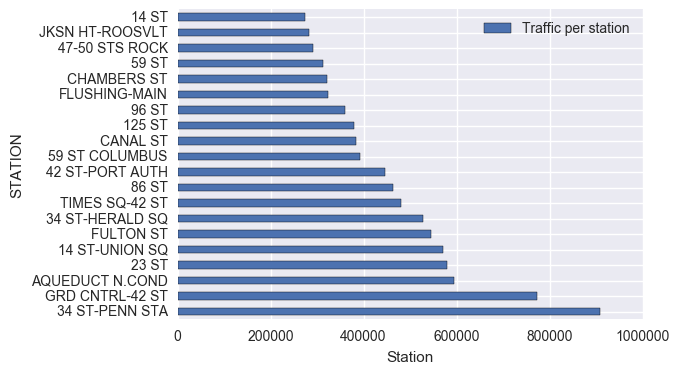

In [34]:
top_20_station_entry_count.plot(kind='barh', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('Station')

> Lets use Seaborn to generate better looking plot

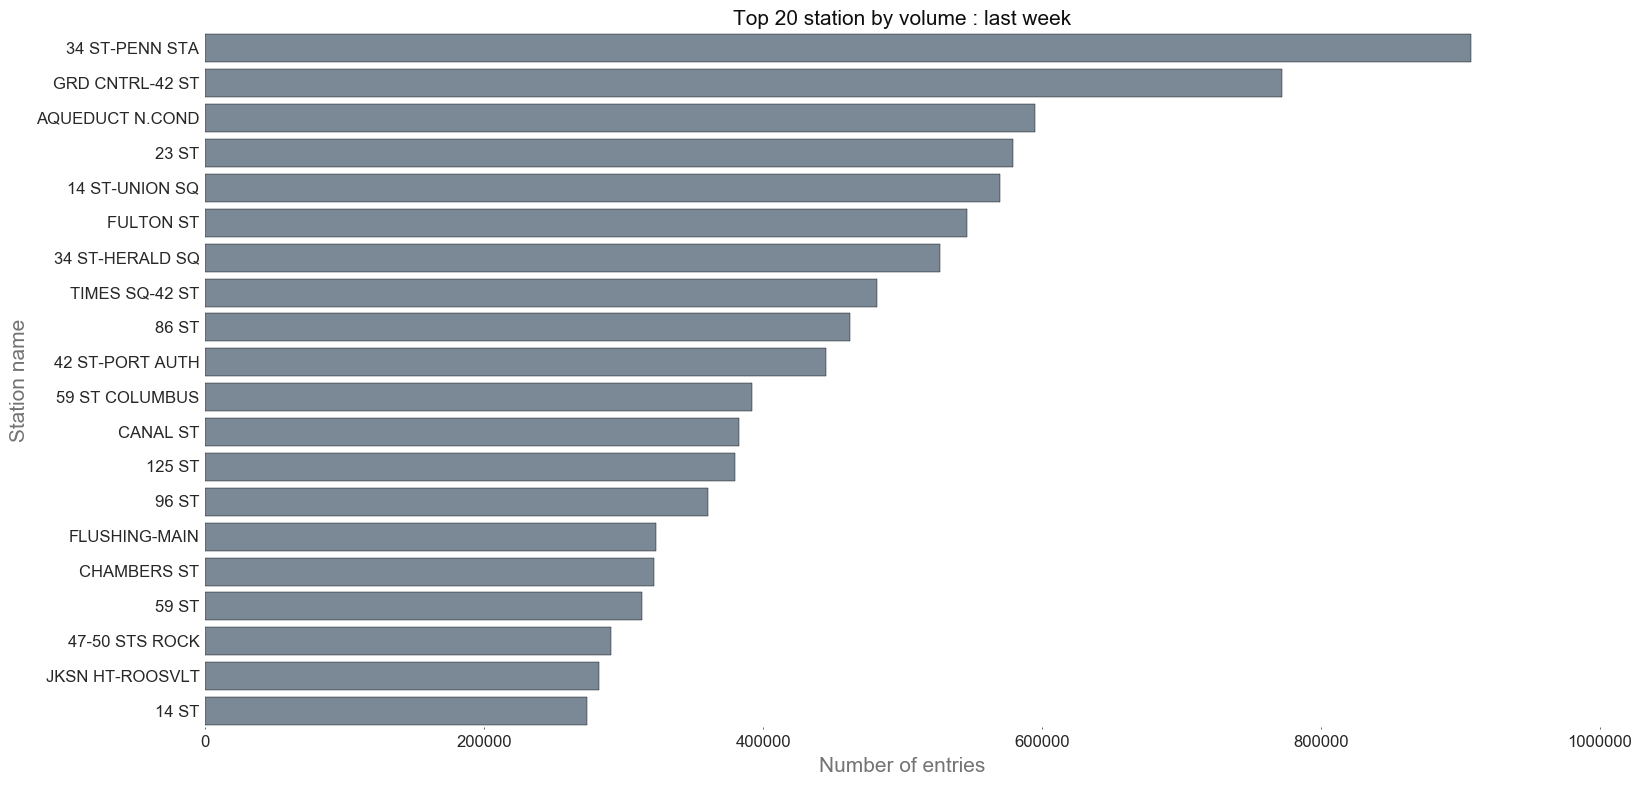

In [35]:
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
sns.reset_orig()
sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 0.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.05'})
#sns.set_context("talk")

f, ax = plt.subplots(figsize=(18, 9))
sns.set(style="whitegrid")
sns.set(font_scale=1)
ax=sns.barplot(y="STATION", x="ENTRIES", data=top_20_station_entry_count,
            label="Total",color='lightslategrey');
sns.despine(left=True, bottom=True,trim=True)
ax.set_title('Top 20 station by volume : last week',fontsize=15)
ax.set_xlabel('Number of entries',fontsize=15)
ax.set_ylabel('Station name',fontsize=15)
#ax.set_xticks([]),
plt.savefig('MTN'+'.'+'png',format='png')
plt.show()
#ax.set_yticks([])

> Convert numeric form of date to a weekday form

In [36]:
df_anal['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_anal.date]

In [37]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
2,0.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
3,1.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
4,4.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24
5,14.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-24


> find out total entries in a station for the particular day of the week

In [38]:
df_anal=df_anal.groupby(by=['STATION','day_of_week']).sum()[['ENTRIES']].sort_values('ENTRIES', ascending=False)

In [39]:
df_anal.reset_index(inplace=True)

In [40]:
df_anal.head()

,STATION,day_of_week,ENTRIES
0,AQUEDUCT N.COND,Sunday,590112.0
1,34 ST-PENN STA,Thursday,164211.0
2,34 ST-PENN STA,Wednesday,163085.0
3,34 ST-PENN STA,Tuesday,163015.0
4,34 ST-PENN STA,Monday,159716.0


> Define a function to give us a custom plot

In [41]:
def plot_hbar(dF,s):
    from pylab import rcParams
    rcParams['legend.handlelength'] = 0.01
    sns.set_style("white",
              {'xtick.major.size': 0.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 10.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.95'})
    sns.set_context("talk")    
    f, ax = plt.subplots(figsize=(11, 8))
    sns.set(style="whitegrid")
    sns.set(font_scale=1.6)
    np.random.seed(sum(map(ord, "aesthetics")))
    ax=sns.barplot(y='ENTRIES', x='day_of_week', data=dF,
            label=s,color='lightslategrey');
    sns.despine(left=True, bottom=True,trim=True)
    ax.set_title('Station by volume',fontsize=20)
    ax.set_xlabel('Day of Week',fontsize=15)
    ax.set_ylabel('Number of entries',fontsize=15)
    #ax.set_xticks([])
    ax.legend(loc='upper right')
    plt.savefig(s+'.'+'png',format='png')
    plt.show()

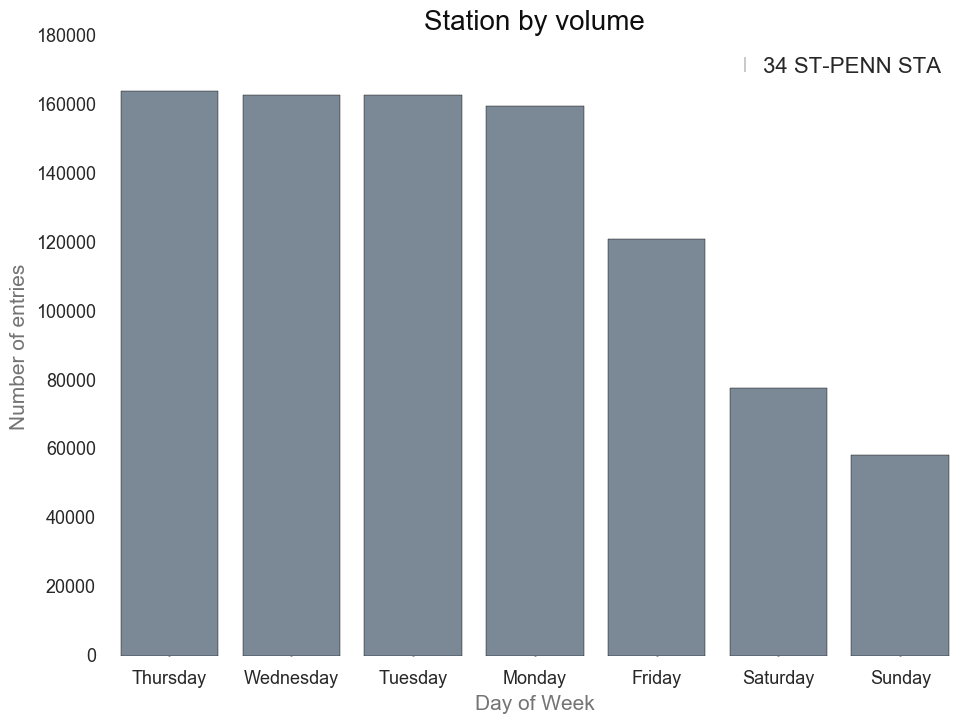

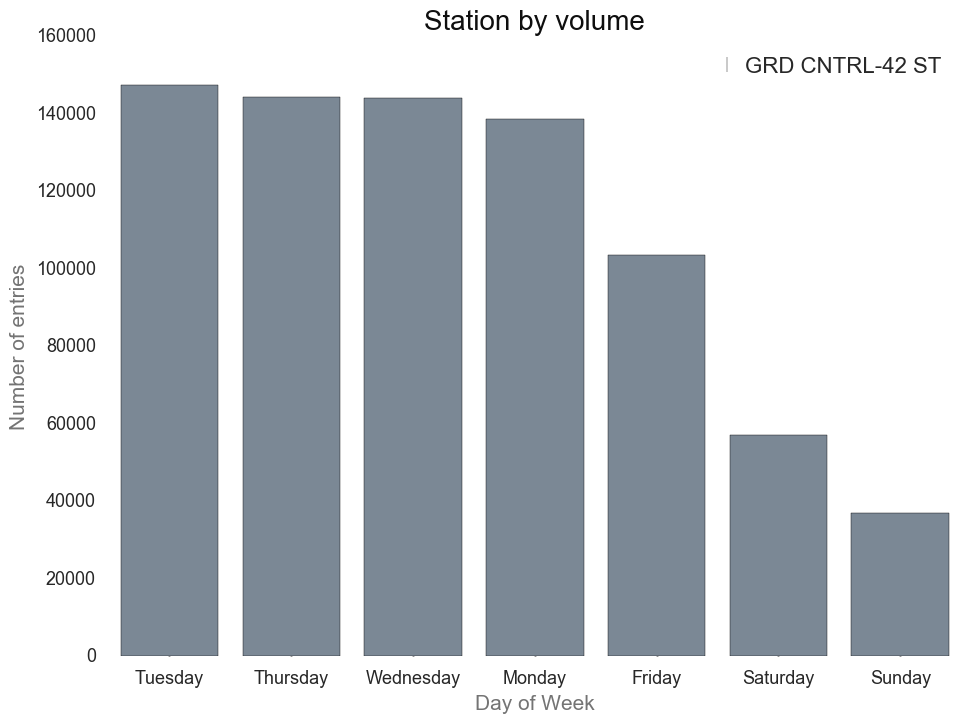

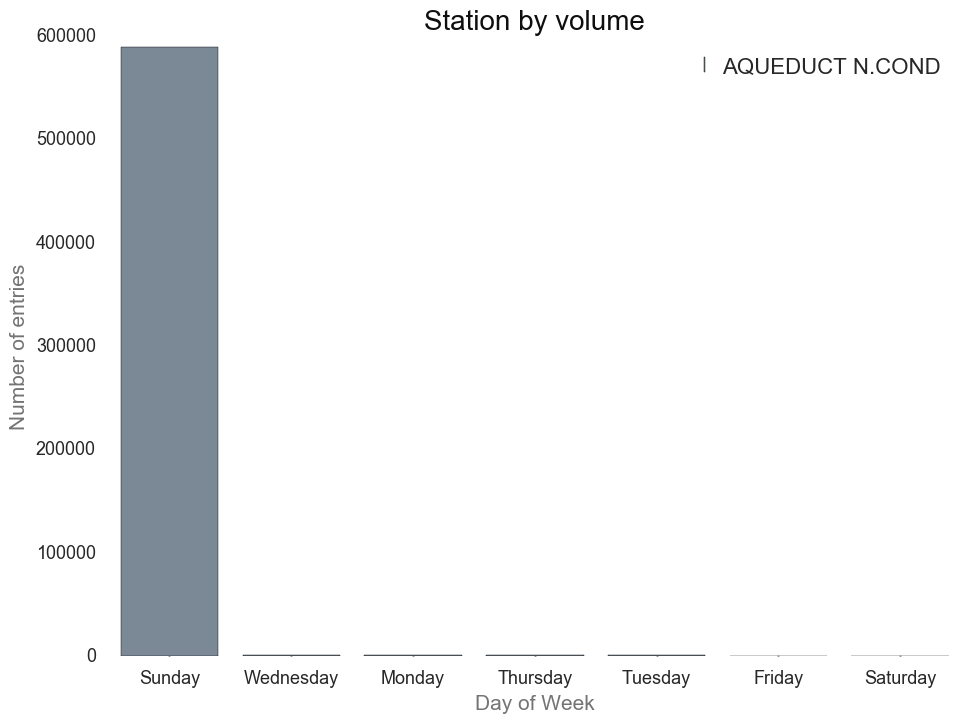

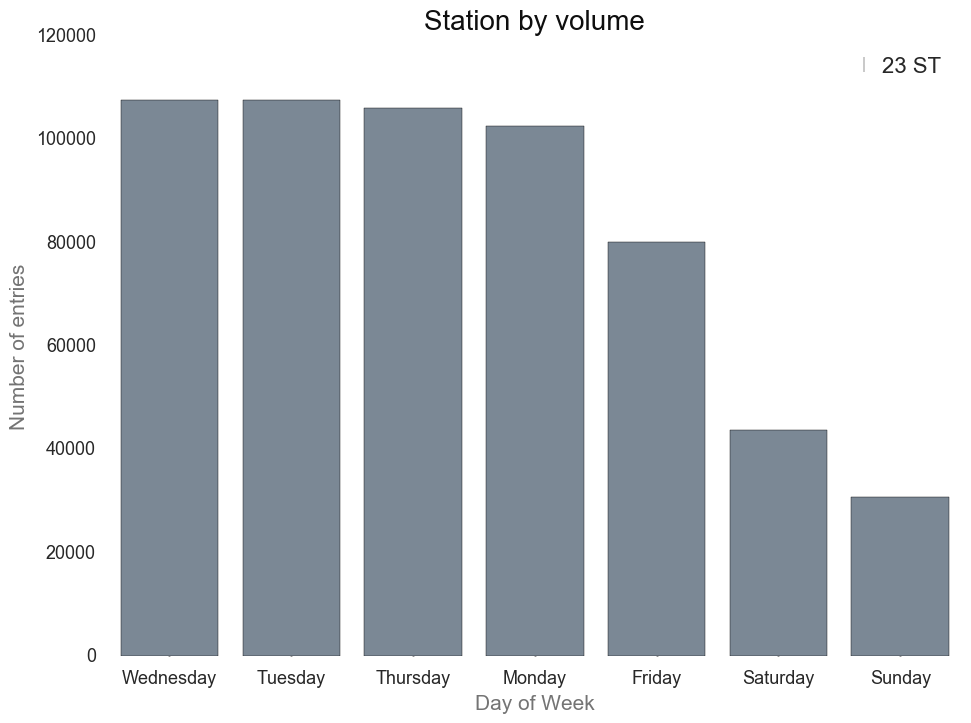

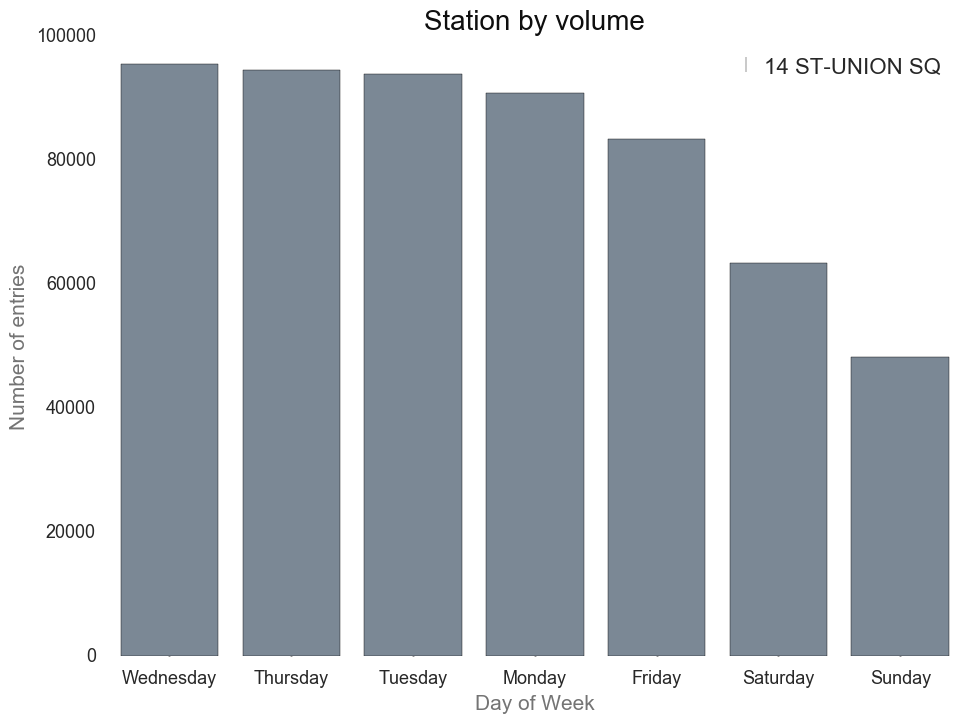

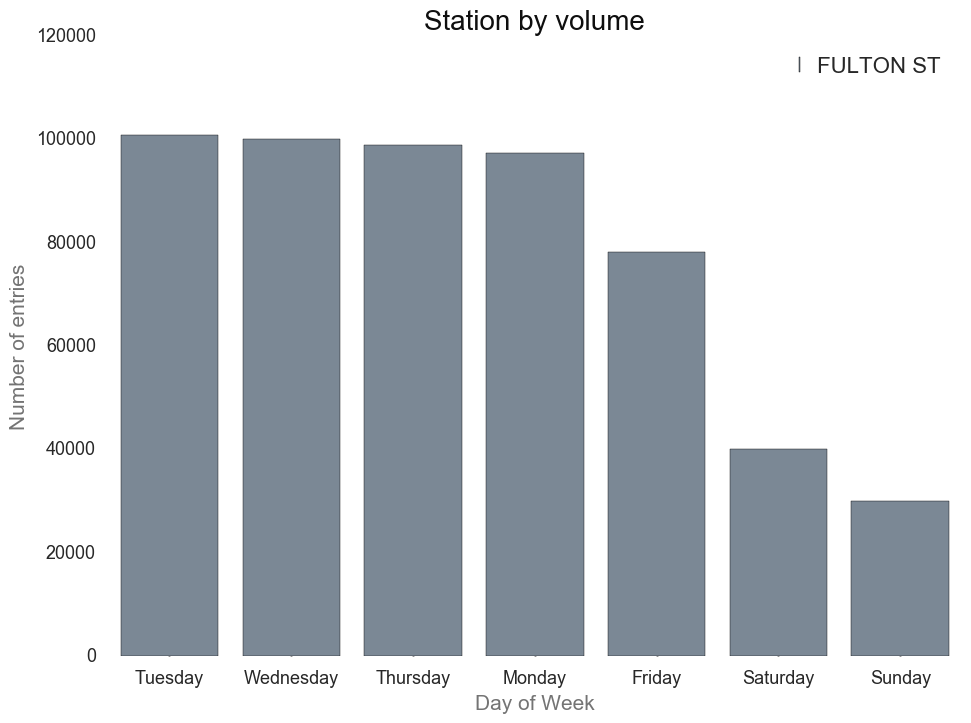

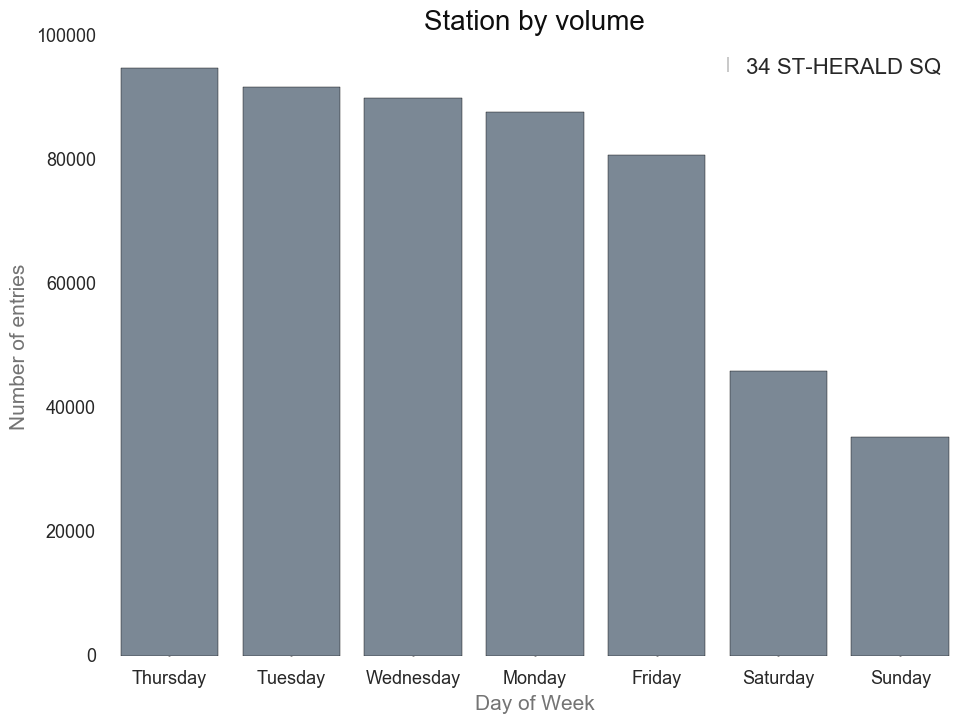

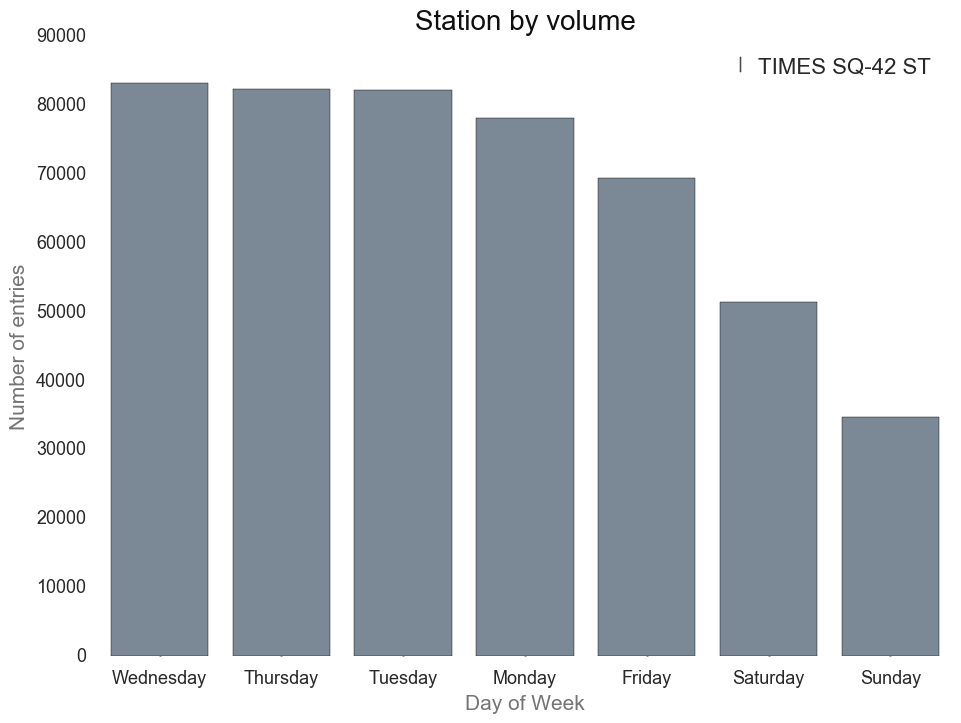

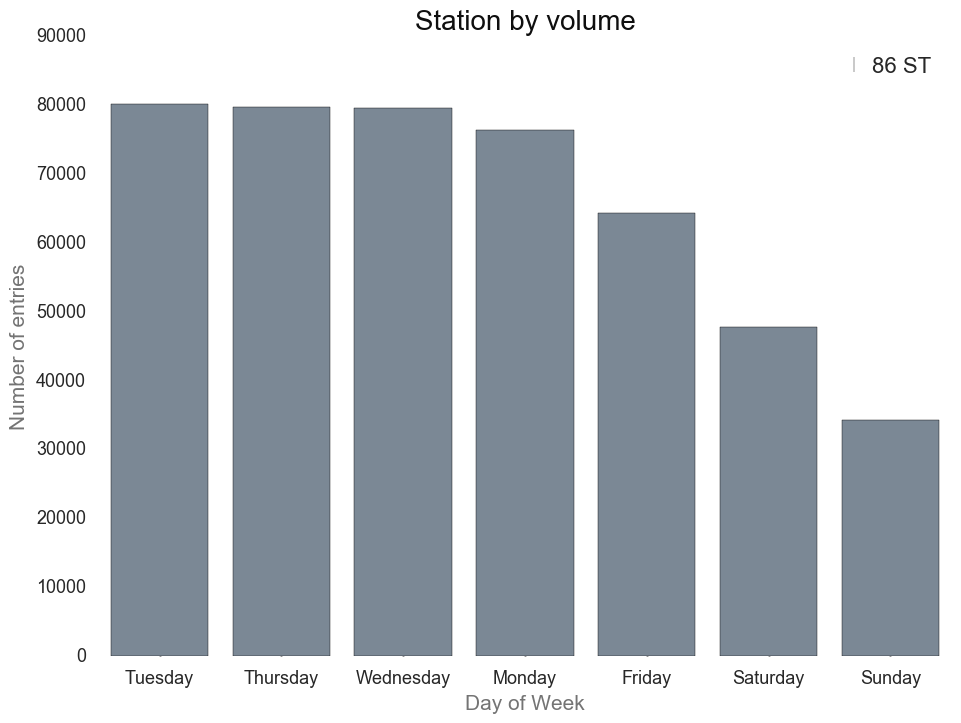

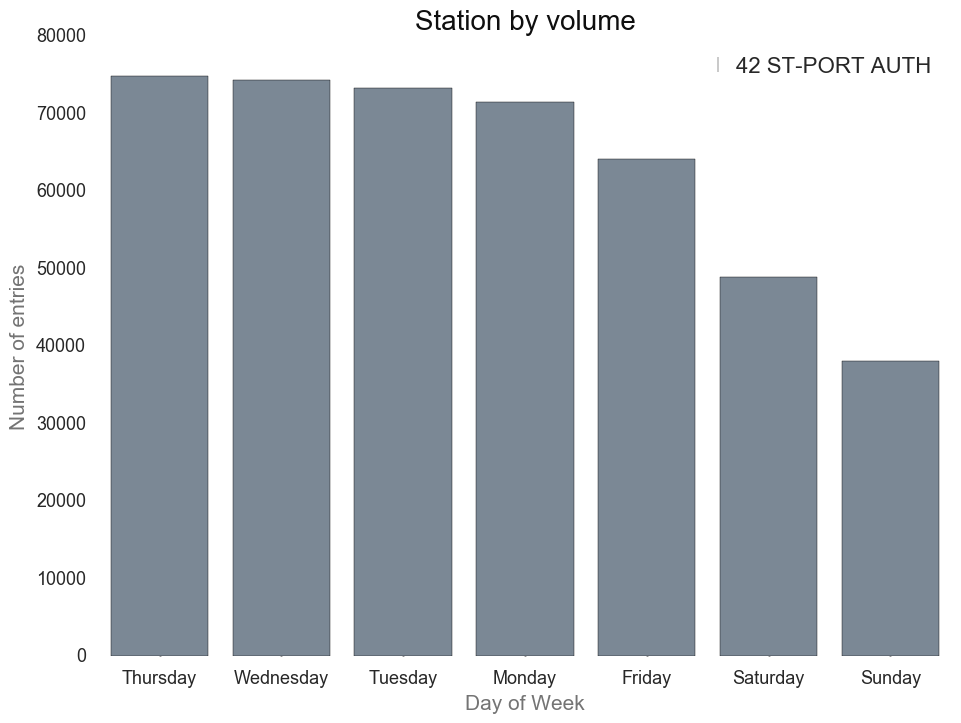

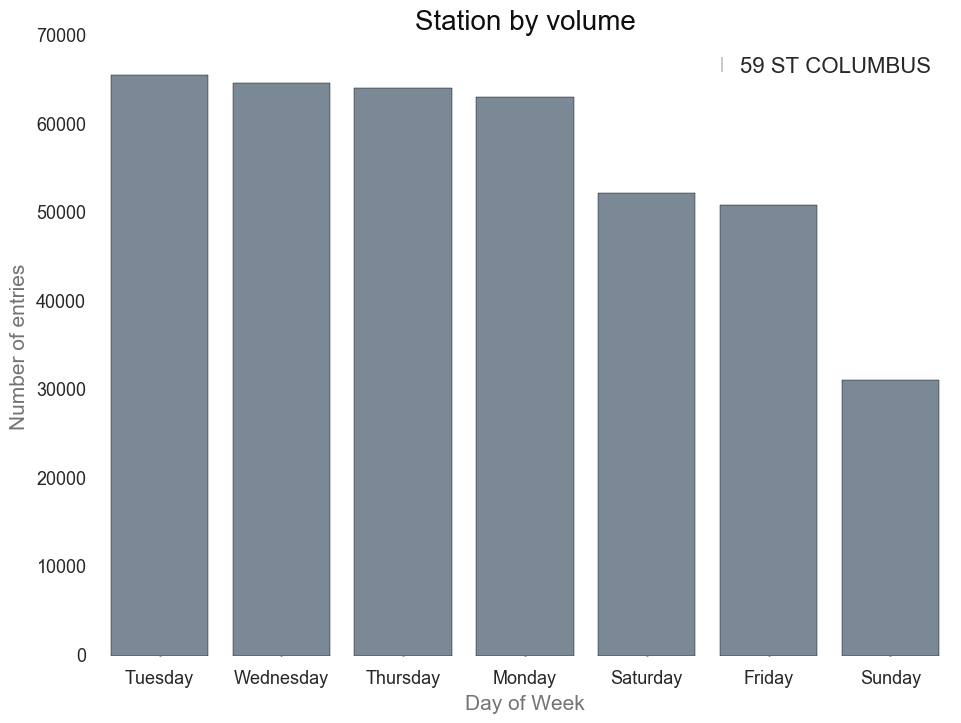

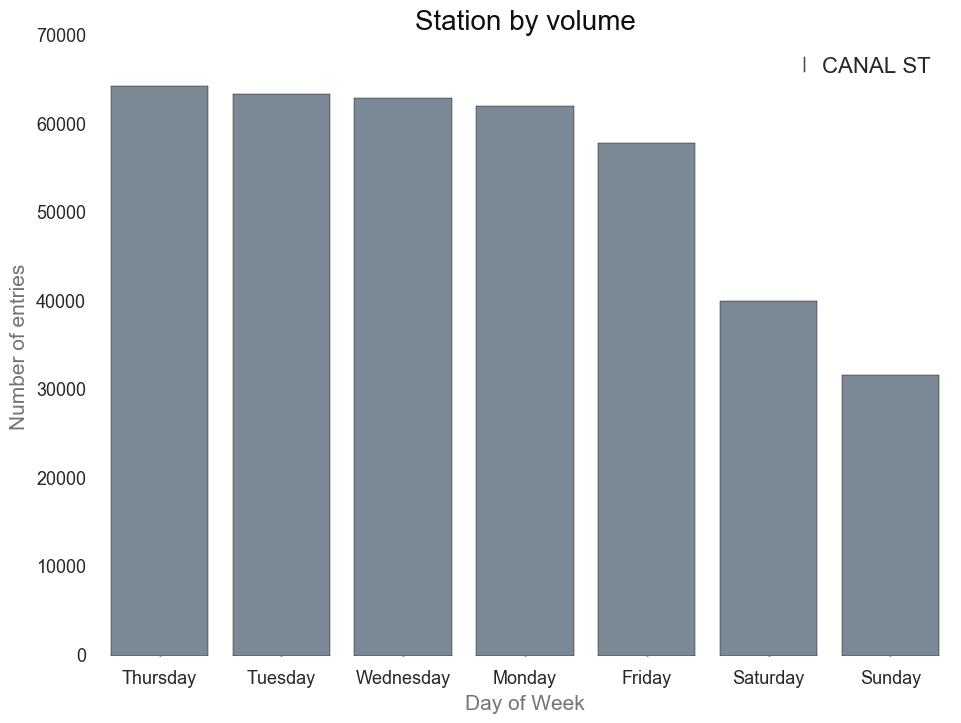

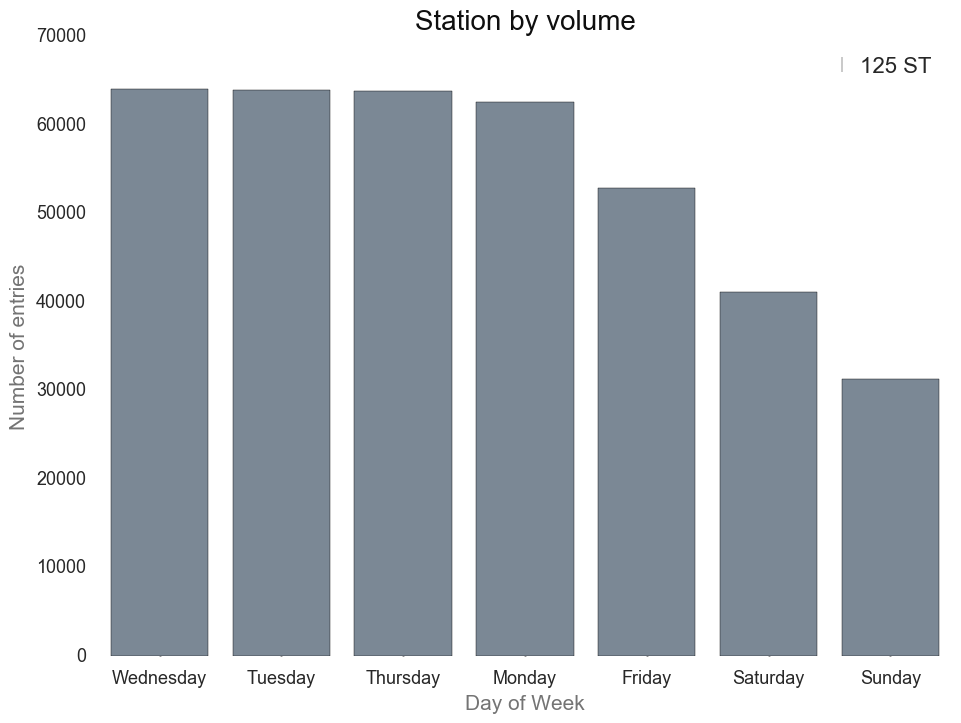

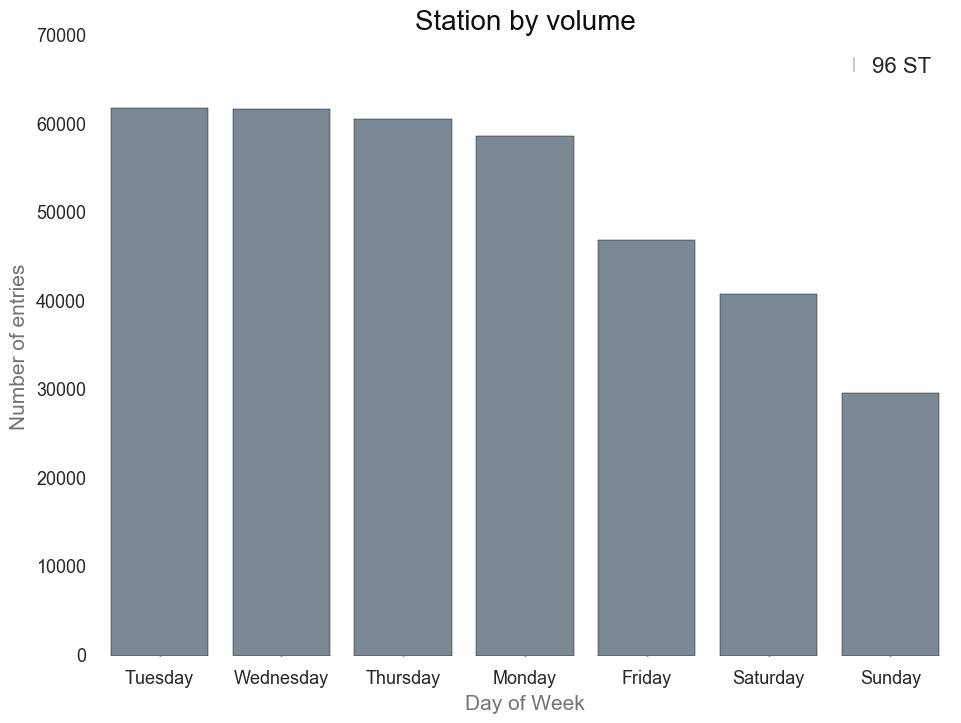

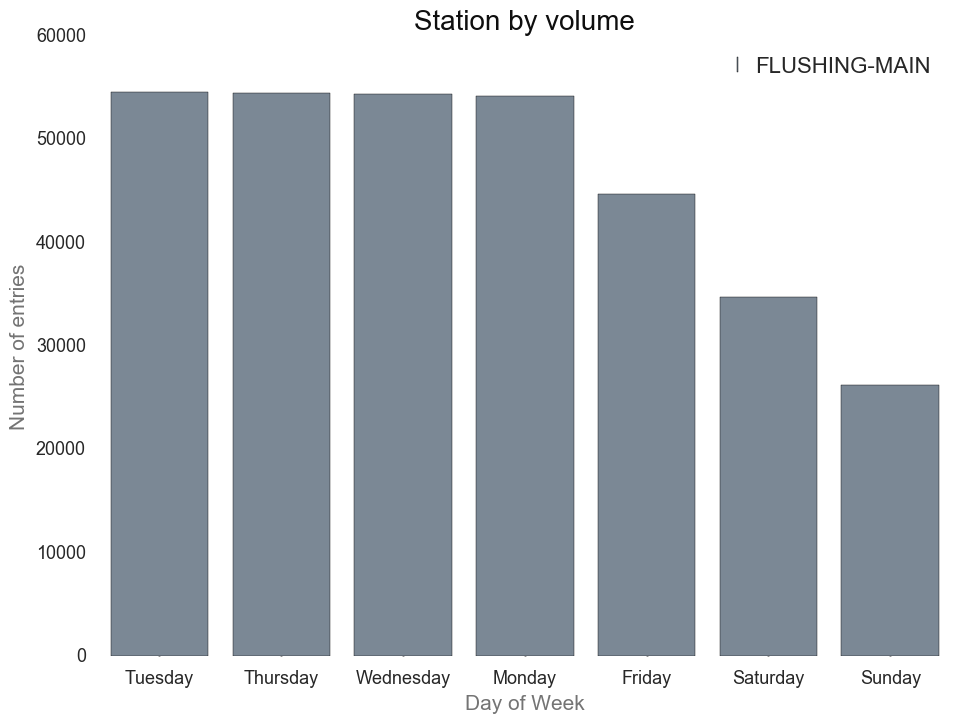

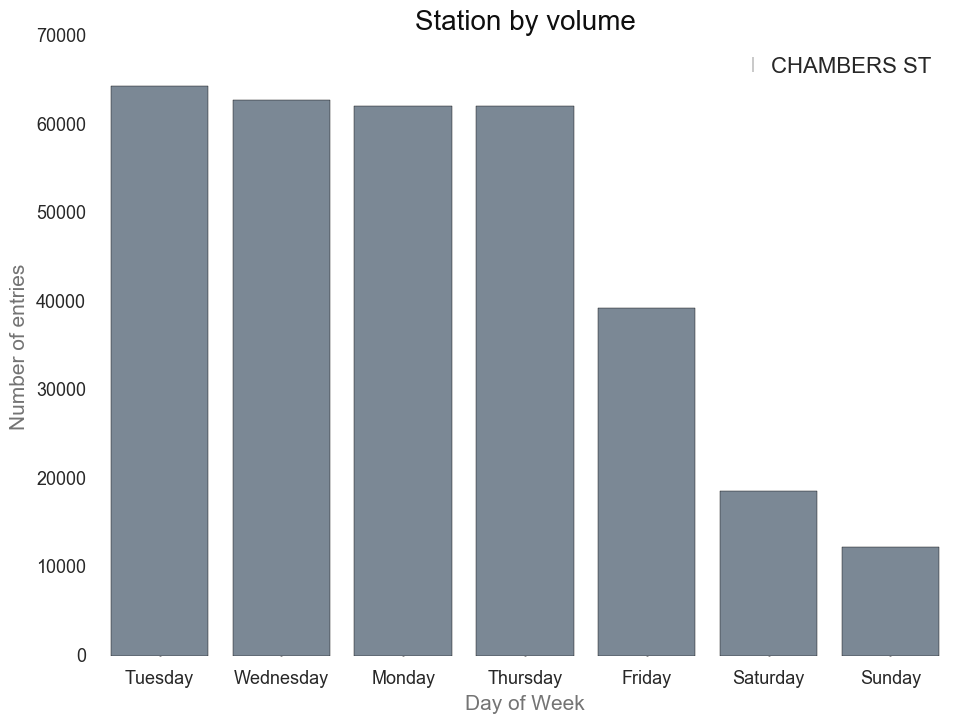

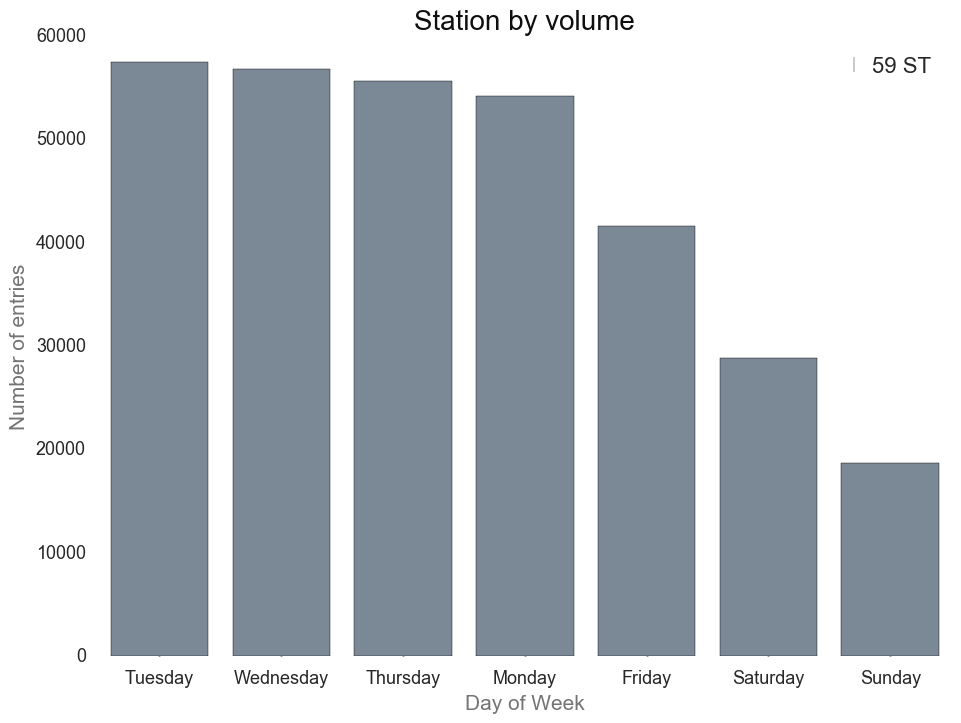

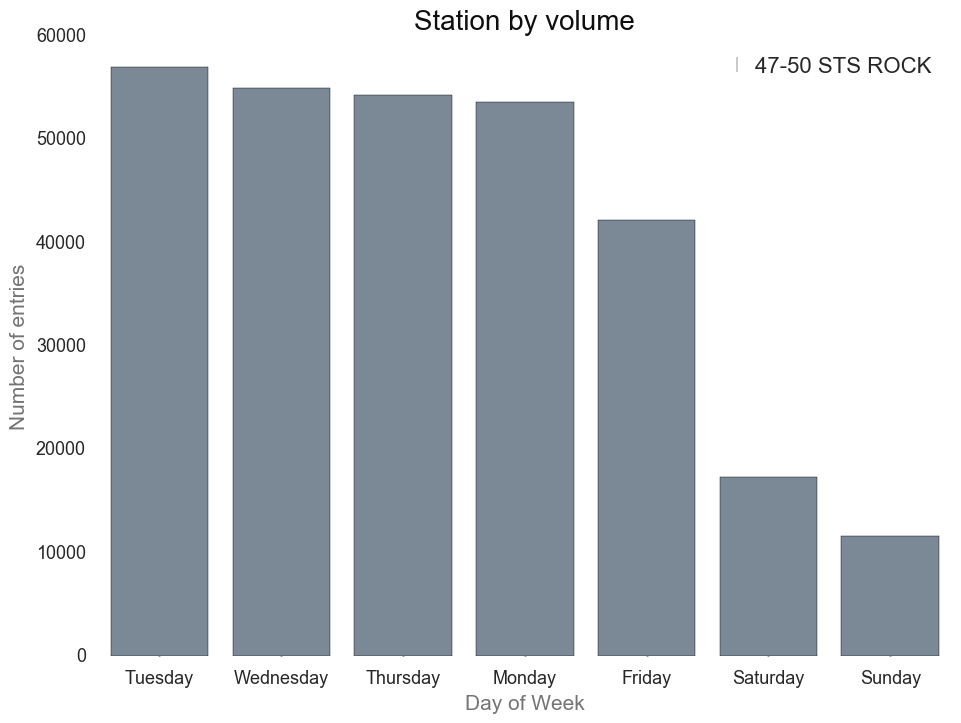

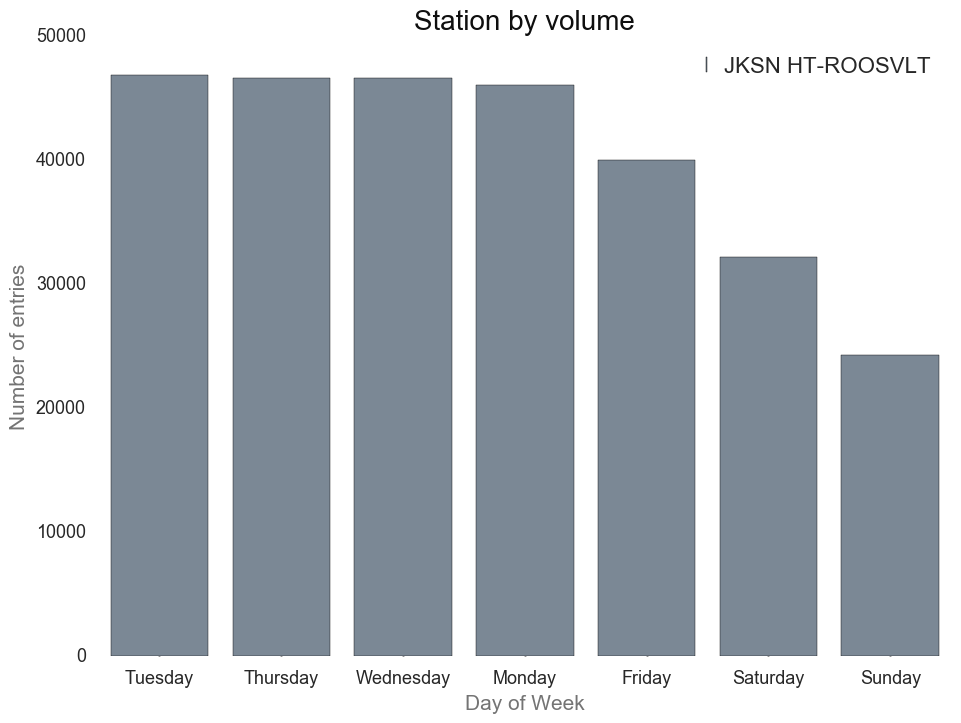

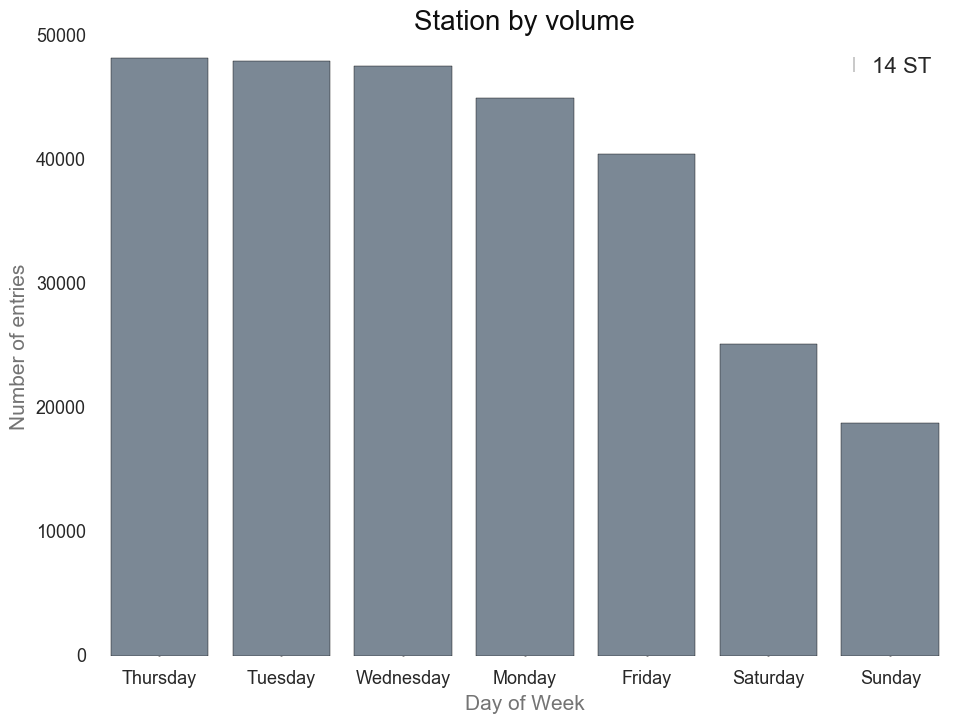

In [42]:
for s in top_20_unique_station:
    df_new=pd.DataFrame()
    df_new=df_anal[df_anal['STATION']==s]
    plot_hbar(df_new,s)
